In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")
import pandas as pd
from read_xlsx import *

In [3]:
def groupedBarPlot(df, plotParams, legendParams, isHorizontal=False):
    plt.figure(figsize=(15, 7))
    g = sns.barplot(x=plotParams["x"],
                    y=plotParams["y"],
                    hue=plotParams["hue"],
                    data=df,
                    ci=95)

    for p in g.patches:
        if isHorizontal:
            g.annotate(format(p.get_width()),
                   xy = (p.get_width(), p.get_y() + p.get_height() / 2),
                   ha='left', va='center',
                   xytext=(9, 0),
                   textcoords='offset points')
        else:
            g.annotate(format(p.get_height()),
                       xy = (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

    plt.legend(bbox_to_anchor=(1.04, 0.5), loc=legendParams["location"], borderaxespad=0, title=legendParams["title"])
    plt.subplots_adjust(right=0.7)
    plt.title(plotParams["title"])
    plt.xlabel(plotParams["xLabel"])
    plt.ylabel(plotParams["yLabel"])
    plt.grid(axis='y')

    plt.show()

##  The number of student’s learning behavior (during COVID-19) with parameter (Gender)

In [4]:
datasetBasedGender = feature_group_by_("Gender",["Male","Female","Not public"])

In [5]:
#datasetBasedGender.head()

,Gender,Learning hours,Total,Mean,Std.Deviation,Lower Bound,Upper Bound,Min,Max
0,Male,Total Online,0,2.77,3.119,2.29,3.25,0,21
1,Male,Total Offline,0,2.95,3.176,2.46,3.43,0,21
2,Male,Hours with instruction,0,1.61,2.481,1.23,1.99,0,20
3,Male,Hours without instruction,0,4.11,4.811,3.37,4.85,0,42
4,Female,Total Online,0,2.60,3.054,2.21,2.99,0,30


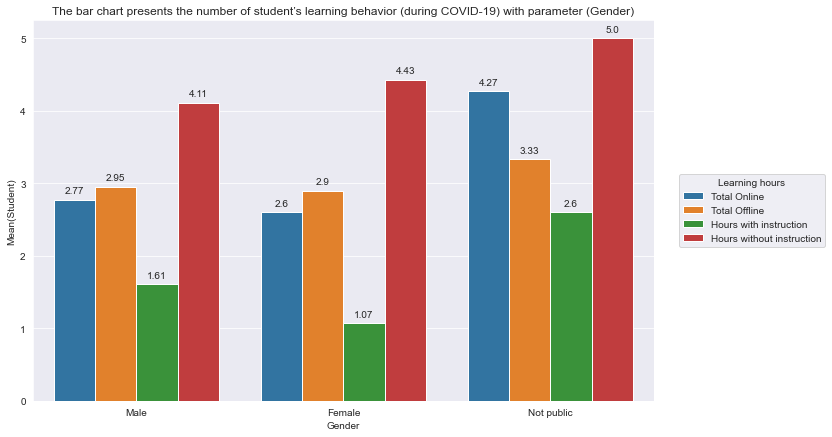

In [6]:
groupedBarPlot(datasetBasedGender,
               plotParams={
                   "x": "Gender",
                   "y": "Mean",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (Gender)",
                   "xLabel": "Gender",
                   "yLabel": "Mean(Student)"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               })

##  Number of student’s learning behavior (duringCOVID-19) with parameter (School type)

In [7]:
datasetBasedSchoolType = feature_group_by_("school_type", ["Public school (normal)", "Public school (Gifted)", "Private school (normal)",
                                  "International school"])

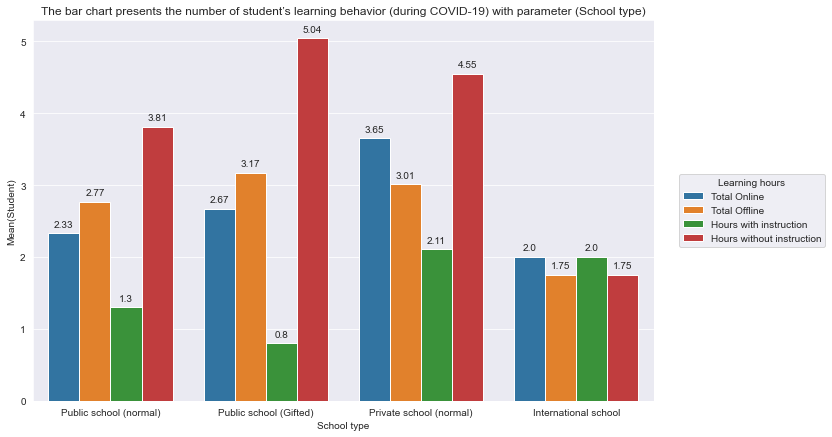

In [8]:
groupedBarPlot(datasetBasedSchoolType,
               plotParams={
                   "x": "school_type",
                   "y": "Mean",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (School type)",
                   "xLabel": "School type",
                   "yLabel": "Mean(Student)"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               })

##  Number of student’s learning behavior (duringCOVID-19) with parameter (Family income)

In [9]:
datasetBasedFamilyIncome = feature_group_by_("income", ["Less than 430 USD",
                             "From 430 to under 860 USD",
                             "From 860 to under 1,290 USD",
                             "From 1,290 to under 1,720 USD",
                             "From 1,720 to under 2,150 USD",
                             "More than 2,150 USD"])

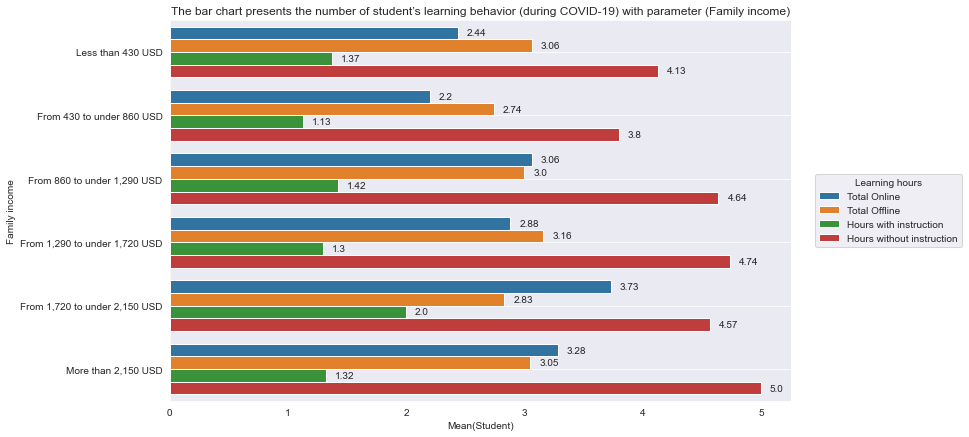

In [10]:
groupedBarPlot(datasetBasedFamilyIncome,
               plotParams={
                   "x": "Mean",
                   "y": "income",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (Family income)",
                   "xLabel": "Mean(Student)",
                   "yLabel": "Family income"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               },
               isHorizontal=True
              )

##  Number of student’s learning behavior (during COVID-19) with parameter (Learning hours at home before COVID-19)

In [11]:
datasetLHBeforeCovid = feature_group_by_("Lh_before_Cov", ["under 4h", "from 4 to 7h", "over 7h"])

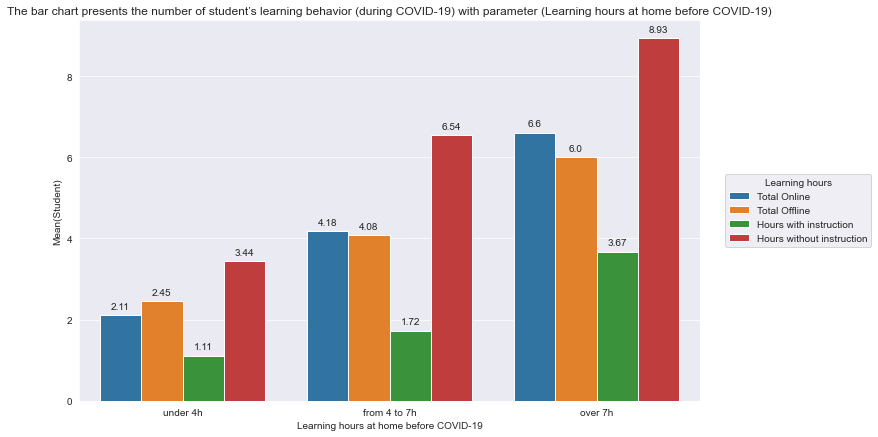

In [12]:
groupedBarPlot(datasetLHBeforeCovid,
               plotParams={
                   "x": "Lh_before_Cov",
                   "y": "Mean",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (Learning hours at home before COVID-19)",
                   "xLabel": "Learning hours at home before COVID-19",
                   "yLabel": "Mean(Student)"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               })

##  Number of student’s learning behavior (during COVID-19) with parameter (Learning hours at home during COVID-19)

In [13]:
datasetLHInCovid = feature_group_by_("Lh_in_Cov", ["under 4h", "from 4 to 7h", "over 7h"])

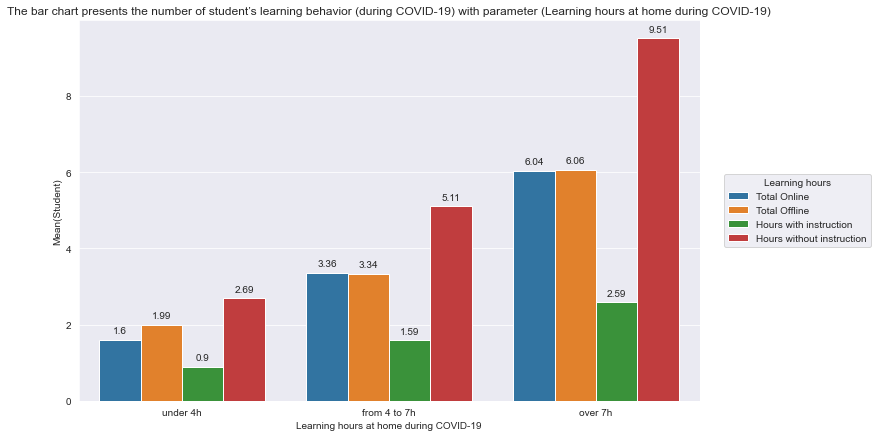

In [14]:
groupedBarPlot(datasetLHInCovid,
               plotParams={
                   "x": "Lh_in_Cov",
                   "y": "Mean",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (Learning hours at home during COVID-19)",
                   "xLabel": "Learning hours at home during COVID-19",
                   "yLabel": "Mean(Student)"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               })

##  Number of student’s learning behavior (during COVID-19) with parameter (Internet and additional Resources)

In [15]:
datasetBasedResource = feature_group_by_("eff_resource",
                  ["Strongly disagree", "Disagree", "Neither agree nor disagree", "Agree", "Strongly agree"])

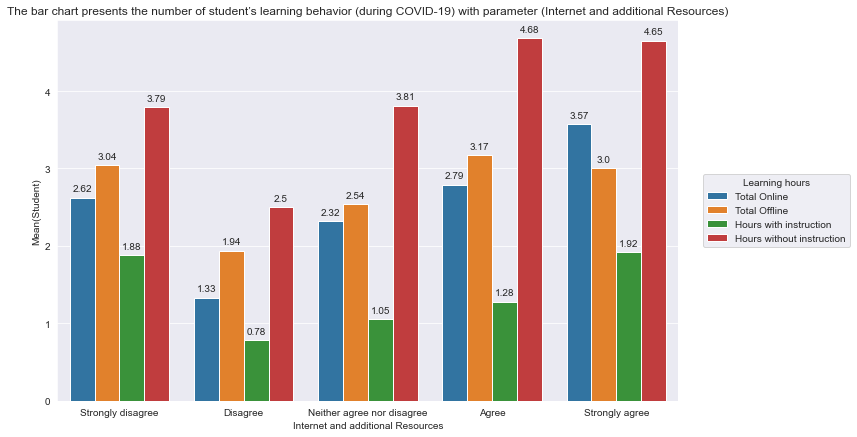

In [16]:
groupedBarPlot(datasetBasedResource,
               plotParams={
                   "x": "eff_resource",
                   "y": "Mean",
                   "hue": "Learning hours",
                   "title": "The bar chart presents the number of student’s learning behavior (during COVID-19) with parameter (Internet and additional Resources)",
                   "xLabel": "Internet and additional Resources",
                   "yLabel": "Mean(Student)"
               },
               legendParams={
                   "location": "center left",
                   "title": "Learning hours"
               })